In [2]:
import math

import torch
import torch.nn as nn
from torch.nn import functional as F

#from mingpt.utils import CfgNode as CN

In [3]:
def GELU(x):
    return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

In [4]:
import matplotlib.pyplot as plt
import numpy as np

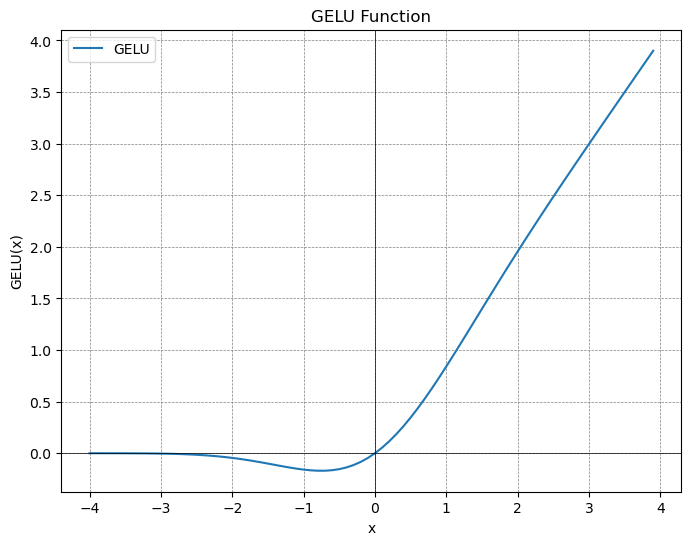

In [6]:
x = torch.arange(-4,4,0.1)
y = GELU(x)
x, y = x.numpy(), y.numpy()

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='GELU')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('GELU Function')
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.legend()
plt.show()

In [7]:
class NewGELU(nn.Module):
    """
    Implementation of the GELU activation function currently in Google BERT repo (identical to OpenAI GPT).
    Reference: Gaussian Error Linear Units (GELU) paper: https://arxiv.org/abs/1606.08415
    """
    def forward(self, x):
        return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

In [9]:
### SETUP STUFF
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def setup_logging(config):
    """ monotonous bookkeeping """
    work_dir = config.system.work_dir
    # create the work directory if it doesn't already exist
    os.makedirs(work_dir, exist_ok=True)
    # log the args (if any)
    with open(os.path.join(work_dir, 'args.txt'), 'w') as f:
        f.write(' '.join(sys.argv))
    # log the config itself
    with open(os.path.join(work_dir, 'config.json'), 'w') as f:
        f.write(json.dumps(config.to_dict(), indent=4))

In [ ]:
class CfgNode:
    def __init__(self, **kwargs):
        # self.__dict__ is a dictionary containing the object's attributes, where the keys are the attribute names and the values are the attribute values.
        # update() is a method provided by dictionaries that takes another dictionary as an argument and updates the dictionary with entries from the other dictionary.
        self.__dict__.update(kwargs)
        
    # determines what happens when you do 'print(CfgNode)'
    def __str__(self):
        return self._str_helper(0)
    def _str_helper(self, indent):
        """ creates pretty nested indentation for pretty printing"""
        parts = []
        for k, v in self.__dict__.items(): # k for key and v for value
            # if a dictionary passed into CfgNode is itself a CfgNode
            if isinstance(v, CfgNode): # checks if the value v is an object of class CfgNode
                parts.append("%s:\n" % k)
                parts.append(v._str_helper(indent + 1)) # recursively calls string helper to cause deeper indent
            else:
                parts.append("%s: %s\n" % (k, v))
        
        parts = [' ' * (indent * 4) + p for p in parts]
        return "".join(parts) # Joins the strings in parts together into a single string
    
    def to_dict(self):
        """ 
        The to_dict method iterates over all key-value pairs in self.__dict__, which holds the object's attributes.
        For each key-value pair, if the value v is an instance of CfgNode, it calls v.to_dict() recursively to obtain a dictionary representation of v. 
        Otherwise, it simply uses v as is.
        A new dictionary is constructed and returned, where each key is associated with either a dictionary representation of a CfgNode object or the original value.
        """
        return { k: v.to_dict() if isinstance(v, CfgNode) else v for k, v in self.__dict__.items() }
    def merge_from_dict(self, d):
        """
        takes a dictionary d as an argument and adds its elements to CfgNode and overwrites old ones
        """
        self.__dict__.update(d)
        
    

In [8]:
x = torch.randn((32,1024,768), requires_grad=True)

B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)